In [1]:
from SpatialQuery.spatial_query import spatial_query
from SpatialQuery.spatial_query_multiple_fov import spatial_query_multi
import os
import anndata as ad
import pandas as pd
import time
pd.set_option('display.max_colwidth', 1000)

In [2]:
data_path = "/Users/sa3520/BWH/spatial query/python/data/CZI_kidney"

In [3]:
data_files = os.listdir(data_path)

In [4]:
adatas = [ad.read_h5ad(os.path.join(data_path, data)) for data in data_files]

In [5]:
spatial_key = 'X_spatial'
label_key = 'cell_type'
disease_key = 'disease'

In [6]:
disease_list = [adata.obs[disease_key].unique()[0] for adata in adatas]
disease_list = list(set(disease_list))
print(f"Kidney disease state: {disease_list}")

Kidney disease state: ['normal', 'diabetic kidney disease', 'autosomal dominant polycystic kidney disease']


In [7]:
disease_normal_adatas = [adata for adata in adatas if adata.obs[disease_key].unique()[0]=='normal']
disease_diabetic_adatas = [adata for adata in adatas if adata.obs[disease_key].unique()[0]=='diabetic kidney disease']

In [8]:
print(f"Number of normal kidney FOVs: {len(disease_normal_adatas)}")
print(f"Number of diabetic kidney FOVs: {len(disease_diabetic_adatas)}")

Number of normal kidney FOVs: 34
Number of diabetic kidney FOVs: 26


In [9]:
datasets = ['normal'] * len(disease_normal_adatas) + ['diabetic kidney disease'] * len(disease_diabetic_adatas)

In [10]:
n_obs_sum = 0
for adata in disease_normal_adatas+disease_diabetic_adatas:
    # print(adata.n_obs)
    n_obs_sum += adata.n_obs
print(f"Total number of cells in normal and diabetic kidney: {n_obs_sum}")

Total number of cells in normal and diabetic kidney: 1499580


In [11]:
cell_types = [adata.obs[label_key] for adata in disease_normal_adatas+disease_diabetic_adatas]
cell_types = pd.concat(cell_types)
print("Distribution of cell types:")
cell_types.value_counts()

Distribution of cell types:


cell_type
kidney proximal convoluted tubule epithelial cell            532273
endothelial cell                                             399542
leukocyte                                                    202569
kidney loop of Henle thick ascending limb epithelial cell    177504
macrophage                                                    48470
kidney distal convoluted tubule epithelial cell               43769
kidney collecting duct principal cell                         33842
blood vessel smooth muscle cell                               26774
kidney interstitial fibroblast                                16220
kidney collecting duct intercalated cell                       8651
podocyte                                                       6423
kidney granular cell                                           1448
mesangial cell                                                 1294
macula densa epithelial cell                                    801
Name: count, dtype: int64

In [12]:
# Initialize spatial query for multiple datasets
start_time=time.time()
multi_sp = spatial_query_multi(adatas=disease_normal_adatas+disease_diabetic_adatas,
                               datasets=datasets, 
                               spatial_key=spatial_key,
                               label_key=label_key,
                               leaf_size=10)
end_time=time.time()
print(f"time: {end_time-start_time}")

time: 0.31000494956970215


In [13]:
# ct = 'podocyte'
# fp_knn = multi_sp.find_fp_knn(ct=ct, dataset='normal', k=20, dis_duplicates=False, min_support=0.4)

In [14]:
# fp_knn

In [15]:
# ct = 'leukocyte'
# fp_dist = multi_sp.find_fp_dist(ct=ct, dataset='normal', max_dist=100, dis_duplicates=False, min_support=0.4)

In [16]:
# fp_dist

In [17]:
# ct = 'leukocyte'
# motifs = [['kidney loop of Henle thick ascending limb epithelial cell', 'leukocyte', 'endothelial cell', 'kidney proximal convoluted tubule epithelial cell'], 
#           ['kidney loop of Henle thick ascending limb epithelial cell', 'leukocyte', 'macrophage', 'endothelial cell'],
#           ['leukocyte', 'macrophage', 'endothelial cell', 'kidney proximal convoluted tubule epithelial cell']]
# motif_enrichment_knn = []
# for motif in motifs:
#     tt = multi_sp.motif_enrichment_knn(ct=ct,
#                                        motifs=motif,
#                                        dataset='normal',
#                                       )
#     motif_enrichment_knn.append(tt)

In [18]:
# motif_enrichment_knn = pd.concat(motif_enrichment_knn)

In [19]:
# motif_enrichment_knn

In [20]:
# ct = 'leukocyte'
# motifs = [['kidney loop of Henle thick ascending limb epithelial cell', 'leukocyte', 'endothelial cell', 'kidney proximal convoluted tubule epithelial cell'], 
#           ['kidney loop of Henle thick ascending limb epithelial cell', 'leukocyte', 'macrophage', 'endothelial cell'],
#           ['leukocyte', 'macrophage', 'endothelial cell', 'kidney proximal convoluted tubule epithelial cell']]
# motif_enrichment_dist = []
# for motif in motifs:
#     tt = multi_sp.motif_enrichment_dist(ct=ct, 
#                                        motifs=motif,
#                                        dataset='normal')
#     motif_enrichment_dist.append(tt)
# motif_enrichement_dist = pd.concat(motif_enrichment_dist)

In [21]:
# motif_enrichment_dist = pd.concat(motif_enrichment_dist)

In [22]:
# motif_enrichment_dist

In [23]:
ct = 'podocyte'
fp0, fp1 = multi_sp.differential_analysis_knn(ct=ct,
                                              k=35,
                                              datasets=['normal', 'diabetic kidney disease'], 
                                              min_support=0.3,
)

In [24]:
fp0

,itemsets,corrected_p_values


In [25]:
fp1

,itemsets,corrected_p_values
1,"(mesangial cell, podocyte, endothelial cell)",2.815882e-12
2,(mesangial cell),2.815882e-12
3,"(mesangial cell, podocyte)",2.815882e-12
4,"(mesangial cell, endothelial cell)",2.815882e-12
0,"(podocyte, endothelial cell)",3.042827e-02


In [26]:
ct = 'podocyte'
min_support = 0.3
motifs = [list(item) for item in fp1['itemsets']]
print(motifs)
motif_enrichment_knn = []
for motif in motifs:
    tt = multi_sp.motif_enrichment_knn(ct=ct, 
                                       motifs=motif, 
                                       dataset='diabetic kidney disease', 
                                       min_support=min_support)
    motif_enrichment_knn.append(tt)
motif_enrichment_knn = pd.concat(motif_enrichment_knn)

[['mesangial cell', 'podocyte', 'endothelial cell'], ['mesangial cell'], ['mesangial cell', 'podocyte'], ['mesangial cell', 'endothelial cell'], ['podocyte', 'endothelial cell']]


In [27]:
motif_enrichment_knn

,center,motifs,n_center_motif,n_center,n_motif,p-val
0,podocyte,"[endothelial cell, mesangial cell, podocyte]",2488,3762,11820,0.0
0,podocyte,[mesangial cell],2496,3762,12846,0.0
0,podocyte,"[mesangial cell, podocyte]",2489,3762,11850,0.0
0,podocyte,"[endothelial cell, mesangial cell]",2495,3762,12802,0.0
0,podocyte,"[endothelial cell, podocyte]",3746,3762,29569,0.0


In [28]:
ct = 'podocyte'
min_support = 0.3
start_time = time.time()
fp0_dist, fp1_dist = multi_sp.differential_analysis_dist(ct=ct, 
                                                         datasets=['normal', 'diabetic kidney disease'],
                                                         min_support=min_support
                                              )
end_time =time.time()
print(f"Time: {end_time-start_time} seconds")

Time: 1.6543779373168945 seconds


In [29]:
fp0_dist

,itemsets,corrected_p_values
0,(kidney proximal convoluted tubule epithelial cell),1.659325e-11
1,"(podocyte, kidney proximal convoluted tubule epithelial cell)",1.659325e-11
2,"(kidney proximal convoluted tubule epithelial cell, endothelial cell)",2.145096e-06
3,"(podocyte, kidney proximal convoluted tubule epithelial cell, endothelial cell)",2.145096e-06


In [30]:
fp1_dist

,itemsets,corrected_p_values
0,"(mesangial cell, podocyte)",2.223065e-12
1,"(mesangial cell, endothelial cell)",2.223065e-12
2,"(mesangial cell, podocyte, endothelial cell)",2.223065e-12
3,(mesangial cell),2.223065e-12


In [31]:
ct = 'podocyte'
min_support = 0.3
motifs = [list(item) for item in fp0_dist['itemsets']]
print(motifs)
motif_enrichment_dist_0 = []
start_time = time.time()
for motif in motifs:
    tt = multi_sp.motif_enrichment_dist(ct=ct, 
                                        motifs=motif, 
                                        dataset='normal', 
                                        min_support=min_support)
    motif_enrichment_dist_0.append(tt)
end_time = time.time()
print(f"Time: {end_time-start_time} seconds")
motif_enrichment_dist_0 = pd.concat(motif_enrichment_dist_0)

[['kidney proximal convoluted tubule epithelial cell'], ['podocyte', 'kidney proximal convoluted tubule epithelial cell'], ['kidney proximal convoluted tubule epithelial cell', 'endothelial cell'], ['podocyte', 'kidney proximal convoluted tubule epithelial cell', 'endothelial cell']]
Time: 302.42495489120483 seconds


In [32]:
motif_enrichment_dist_0

,center,motifs,n_center_motif,n_center,n_motif,p-val
0,podocyte,[kidney proximal convoluted tubule epithelial cell],2416,2661,625009,2.680844e-117
0,podocyte,"[kidney proximal convoluted tubule epithelial cell, podocyte]",2416,2661,30143,0.000000e+00
0,podocyte,"[endothelial cell, kidney proximal convoluted tubule epithelial cell]",2410,2661,608844,4.190490e-134
0,podocyte,"[endothelial cell, kidney proximal convoluted tubule epithelial cell, podocyte]",2410,2661,29889,0.000000e+00


In [33]:
ct = 'podocyte'
min_support = 0.3
motifs = [list(item) for item in fp1_dist['itemsets']]
print(motifs)
motif_enrichment_dist_1 = []
start_time = time.time()
for motif in motifs:
    tt = multi_sp.motif_enrichment_dist(ct=ct, 
                                        motifs=motif, 
                                        dataset='diabetic kidney disease', 
                                        min_support=min_support)
    motif_enrichment_dist_1.append(tt)
end_time = time.time()
print(f"Time: {end_time-start_time} seconds")
motif_enrichment_dist_1 = pd.concat(motif_enrichment_dist_1)

[['mesangial cell', 'podocyte'], ['mesangial cell', 'endothelial cell'], ['mesangial cell', 'podocyte', 'endothelial cell'], ['mesangial cell']]
Time: 197.55511116981506 seconds


In [34]:
motif_enrichment_dist_1

,center,motifs,n_center_motif,n_center,n_motif,p-val
0,podocyte,"[mesangial cell, podocyte]",2650,3762,15764,0.0
0,podocyte,"[endothelial cell, mesangial cell]",2647,3762,16862,0.0
0,podocyte,"[endothelial cell, mesangial cell, podocyte]",2647,3762,15747,0.0
0,podocyte,[mesangial cell],2650,3762,16882,0.0


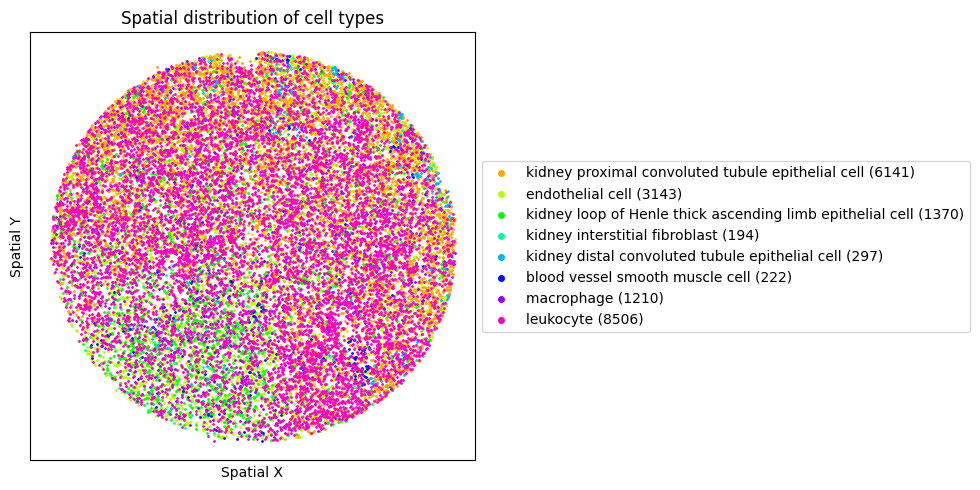

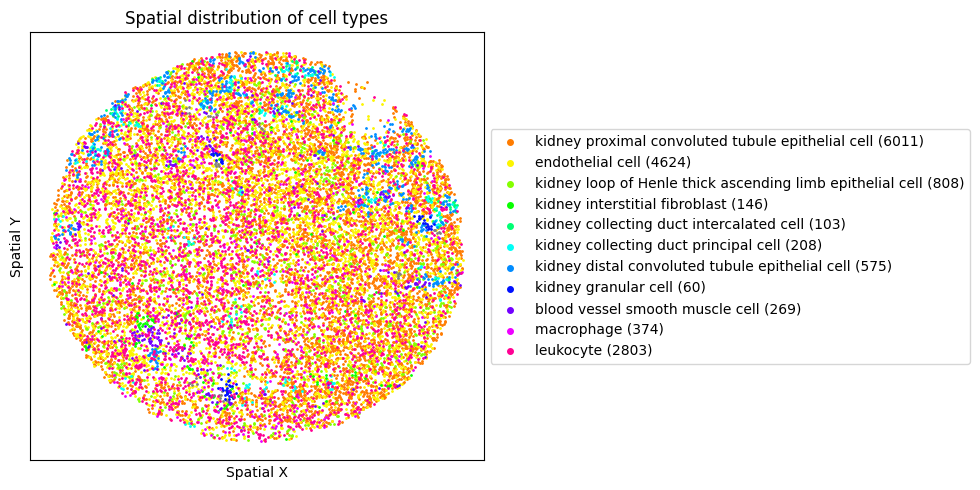

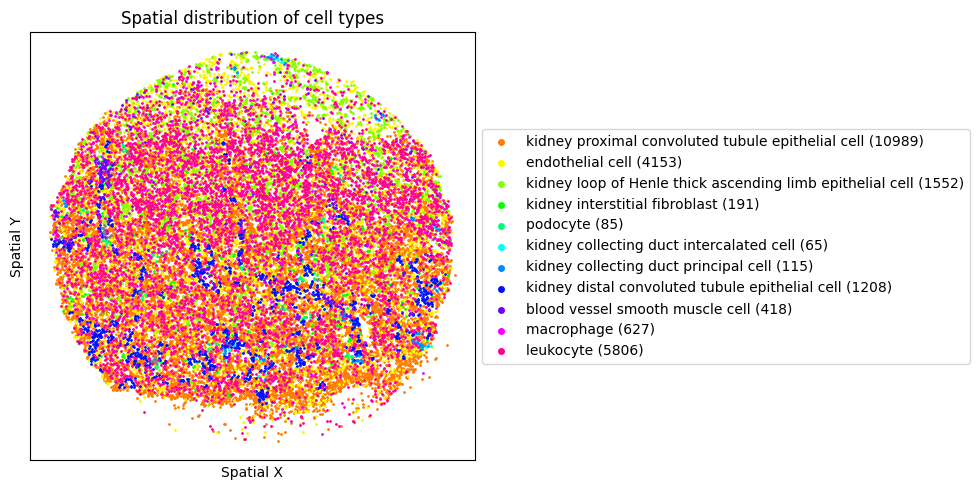

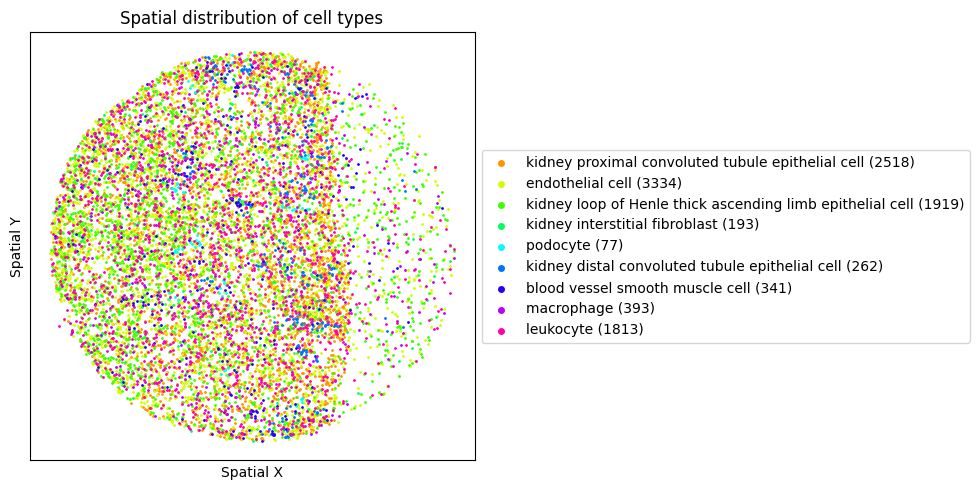

In [35]:
for adata in disease_normal_adatas[0:4]:
    tt = spatial_query(adata, dataset='normal', spatial_key=spatial_key, label_key=label_key)
    tt.plot_fov(fig_size=(9,5))

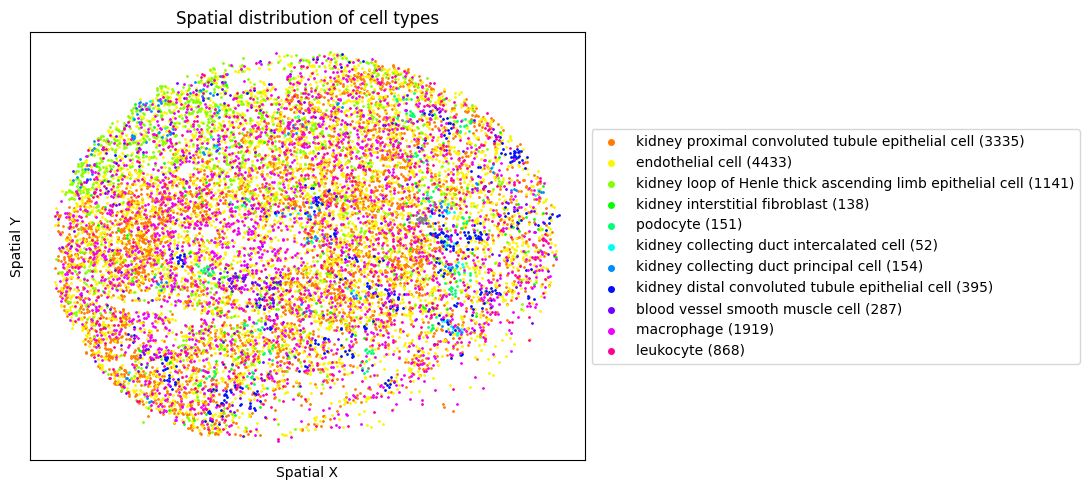

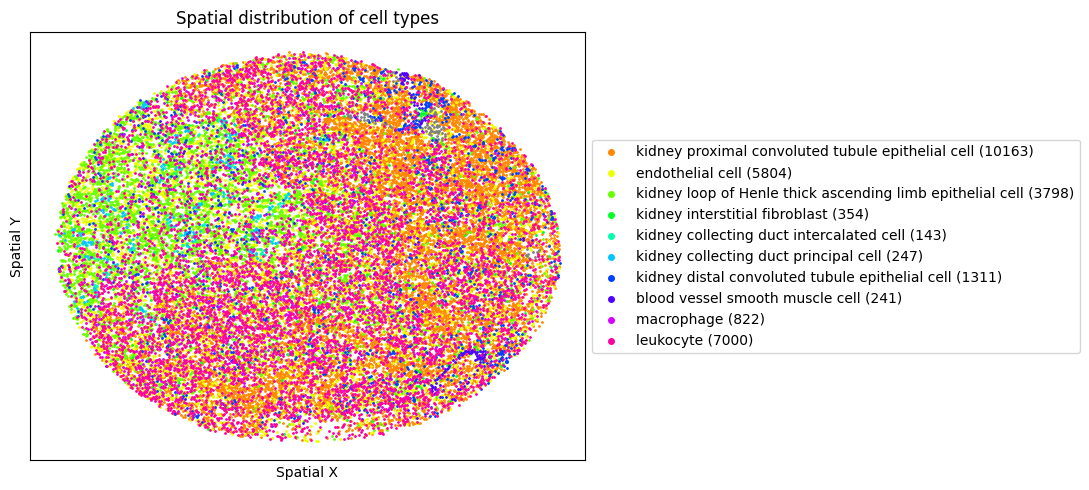

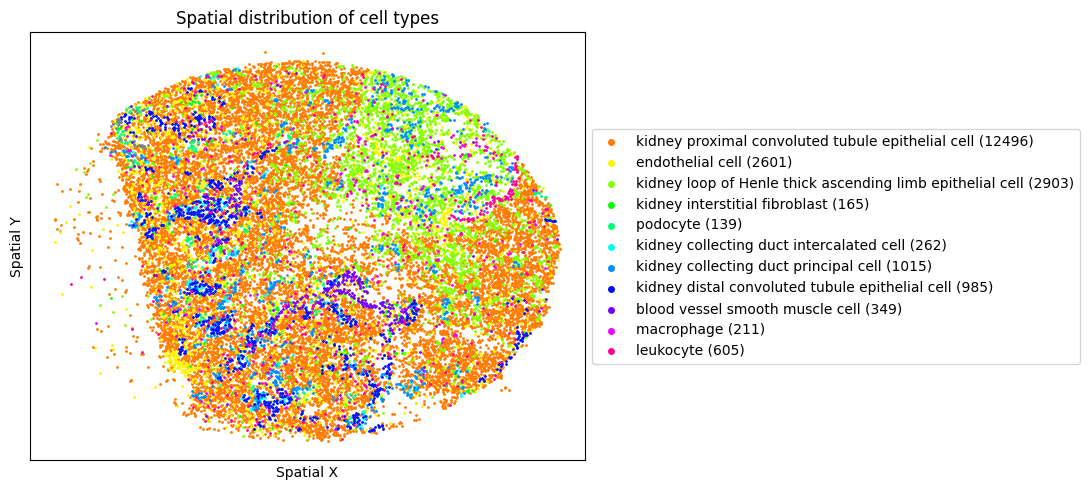

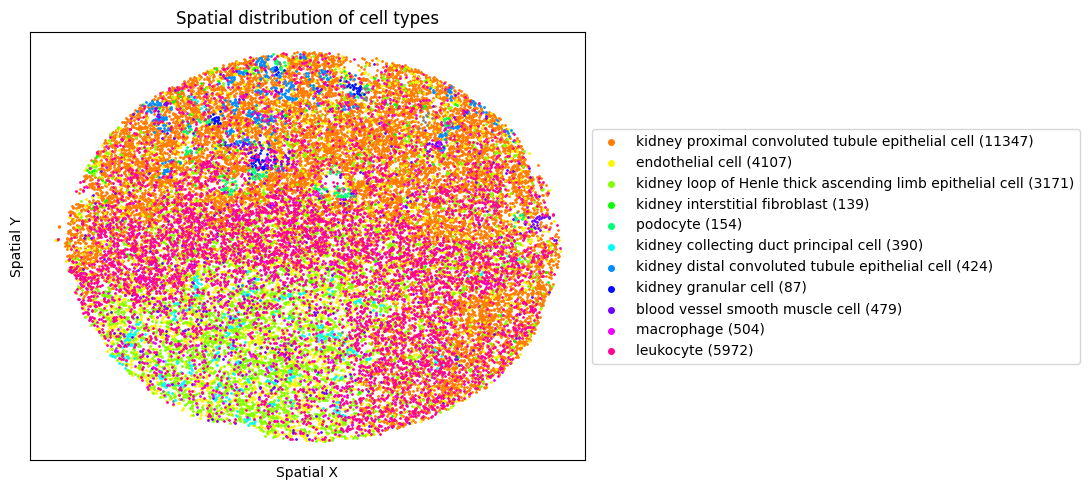

In [36]:
for adata in disease_diabetic_adatas[0:4]:
    tt = spatial_query(adata, dataset='diabetic', spatial_key=spatial_key, label_key=label_key)
    tt.plot_fov()